# Lab 1: Multiple layer Neural Network (MLP) 
This notebook has been prepared by Hsiu-Wen (Kelly) Chang from MINES ParisTech for the class machine learning

## Pytorch 

Pytorch is the most powerful open source deep learning framework. It is a replacement for NumPy (a python library for scientific computing) to use the power of GPUs and other accelerators. Also, the automatic differentiation library is useful to implement neural netorks. In this practical lession, you will first review the use of Numpy to solve a regression problem. Then the use of Pytorch to solve the same problem. Finally, you will practice how to create a complete class to solve a classification problem. 

## Goal
Part 1: Use Numpy to build a simple neural network fit a third order polynomial to sine function and how to replace it with Pytorch

Part 2: Practice the use of neural network from sratch: architecture, activations, training

Part 3: Practice the use of pytorch module to train an image classifier

*** You have four practice questions for your own coding ***


### Part 1: Numpy and Pytorch (regression)

In [11]:
%matplotlib inline

99 465.5190562145013
299 214.3242382901873
499 101.58720183573529
699 50.83913261401951
899 27.92152534066613
1099 17.53623587483562
1299 12.812705078563507
1499 10.655919307269862
1699 9.667083364736655
1899 9.211788882795034
Result: y = 0.01198861342253712 + 0.8451948797411644 x + -0.0020682353067760935 x^2 + -0.09168807629966694 x^3


99 465.5190562145013
299 214.3242382901873
499 101.58720183573529
699 50.83913261401951
899 27.92152534066613
1099 17.53623587483562
1299 12.812705078563507
1499 10.655919307269862
1699 9.667083364736655
1899 9.211788882795034
Result: y = 0.01198861342253712 + 0.8451948797411644 x + -0.0020682353067760935 x^2 + -0.09168807629966694 x^3


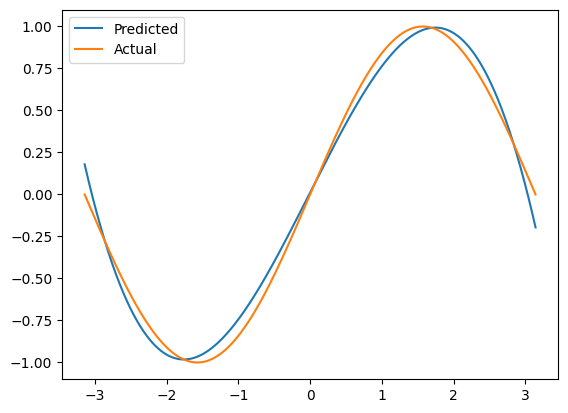

In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

# Hyperparameters
learning_rate = 1e-6
epochs = 2000

for t in range(epochs):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3``
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 200 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2*(y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

# Print final result
y_pred = a + b * x + c * x ** 2 + d * x ** 3
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
plt.plot(x, y_pred, label='Predicted')
plt.plot(x, y, label='Actual')
plt.legend()
plt.show()

As we can see from this easy code, we need to compute gradients and manually update weights, and we are not using a GPU to accelerate the calculation. We are now starting to use PyTorch and a GPU. 

### Tensor and autograd 
- tensor is an n-dimensional array that can keep track of a computational graph and gradients, which is important for deep learning. When ``x.requires_grad`` is true, PyTorch's autograd will track its gradients during forward pass. 
- autograd is a package that define a compuational graph while execute forward pass of a NN. Nodes in the graphe will be tensors and functions will be edges. Backprogating through this graph then allows us to easily compute gradients 

You should be cautious about it because you don't need it on when it is during test mode. And a common error is caused by not reset gradient after the weight update.

In [7]:
import torch
dtype = torch.float
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# move input and output to the device
x = torch.tensor(x, device=device, dtype=dtype)
y = torch.tensor(y, device=device, dtype=dtype)

# Randomly initialize weights
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 200 == 99:
        print(t, loss)

    #use autograd to compute backward pass
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

# Final prediction and plotting
y_pred = a + b * x + c * x ** 2 + d * x ** 3
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')


Using device: cuda:0
99 tensor(2062.6299, device='cuda:0', grad_fn=<SumBackward0>)
99 tensor(2062.6299, device='cuda:0', grad_fn=<SumBackward0>)
299 tensor(913.7736, device='cuda:0', grad_fn=<SumBackward0>)
299 tensor(913.7736, device='cuda:0', grad_fn=<SumBackward0>)
499 tensor(407.9778, device='cuda:0', grad_fn=<SumBackward0>)
499 tensor(407.9778, device='cuda:0', grad_fn=<SumBackward0>)
699 tensor(185.0869, device='cuda:0', grad_fn=<SumBackward0>)
699 tensor(185.0869, device='cuda:0', grad_fn=<SumBackward0>)
899 tensor(86.7608, device='cuda:0', grad_fn=<SumBackward0>)
899 tensor(86.7608, device='cuda:0', grad_fn=<SumBackward0>)
1099 tensor(43.3336, device='cuda:0', grad_fn=<SumBackward0>)
1099 tensor(43.3336, device='cuda:0', grad_fn=<SumBackward0>)
1299 tensor(24.1275, device='cuda:0', grad_fn=<SumBackward0>)
1299 tensor(24.1275, device='cuda:0', grad_fn=<SumBackward0>)
1499 tensor(15.6208, device='cuda:0', grad_fn=<SumBackward0>)
1499 tensor(15.6208, device='cuda:0', grad_fn=<SumB

Now let's move to modern way to solve this simple task by Pytorch. 

 - ``nn`` module

Computaional graphs for deeper network need high-level of abstraction: layers. The ``nn`` package defines a set of Modules, which are roughly equivalent to a neural network layers. Each module receives input Tensors and computes output Tensors, but also hold internal state such as Tensors containing learnable parameters. The nn package also defines a set of useful loss functions. 

 - ``optim``

We can see that update weights of our models by manually mutating the tensors holding learnable parameters (some might not be learnable when we do transfer learning) with torch.no_grad(). The ``optim`` package provides us modern optimization algorithms such as AdaGrad, RMSProp, Adam. Here we demonstrate RMSprop algorithm. 

 - fit function
This function reduce the repeated code for training. This is useful when you fine tuing hyperparameters.

In [10]:
# continaul with the same example
# prepare input features
x_features = torch.stack((x, x**2, x**3), dim=1)  # shape (2000, 3)

#define model, by default, the newly-created module lives on CPU. It is needed to make sure the all the tensors and modules are on the same device
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0,1) # it flatterns the output of the linear layer to 1D tensor to match the shape of y
)
model.to(device)
#define loss function: we use mean squared error for regression
loss_fn = torch.nn.MSELoss(reduction='sum')

# define optimizer: we use RMSprop
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)

for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = model(x_features)  # shape (2000,)

    # Compute and print loss
    loss = loss_fn(y_pred, y)
    if t % 200 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

linear_layer=model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 975.87451171875
299 573.8546142578125
499 304.48040771484375
299 573.8546142578125
499 304.48040771484375
699 137.09417724609375
899 49.06773376464844
699 137.09417724609375
899 49.06773376464844
1099 14.640591621398926
1299 8.937797546386719
1099 14.640591621398926
1299 8.937797546386719
1499 8.952737808227539
1699 8.911527633666992
1499 8.952737808227539
1699 8.911527633666992
1899 8.924530029296875
Result: y = 0.0004992642789147794 + 0.8572334051132202 x + 0.0004993790062144399 x^2 + -0.09283621609210968 x^3
1899 8.924530029296875
Result: y = 0.0004992642789147794 + 0.8572334051132202 x + 0.0004993790062144399 x^2 + -0.09283621609210968 x^3


 - Wrape all you need to a class

In deep learning, it is important to test several models with different hyperparameter settings. Here is how we can wrap everything we need to a class.

In [ ]:
class mlpregression(torch.nn.Module):
    def __init__(self):
        super().__init()
        self.a=torch.nn.Parameter(torch.randn())
        self.b=torch.nn.Parameter(torch.randn())
        self.c=torch.nn.Parameter(torch.randn())
        self.d=torch.nn.Parameter(torch.randn())

    def forward(self, x):
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        return y  

$\textbf{Practice 1}$: use this class to redo the training of the regression task. Overall, you should have the flowchat of the algorithm like this
1. initialization
2. forward
3. loss
4. Backward
5. optimize

## Part II: Pytorch on classifiction with hand-drawn digits images
----------------

We are going to targeting the application of predicting the hand-drawn digits (between 0 and 9) in a given black-and-white image. First, we will see how to preprocess the data and eventually use the public dataset provided by ```torchvision```. 

(1) download raw images by URL. 
![](http://perso.mines-paristech.fr/fabien.moutarde/ES_MachineLearning/TP_convNets/mnist.png)  
You can use [pathlib](https://docs.python.org/3/library/pathlib.html)
for dealing with paths (part of the Python 3 standard library), and download the dataset using
[requests](http://docs.python-requests.org/en/master/). We will only import modules when we use them, so you can see exactly what's being used at each point.


In [13]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [14]:
import os
print(os.getcwd())
print((PATH / FILENAME))

/mnt/c/Users/Kelly/Desktop/Course material/MinesParis_ML/git/MinesParisTech-ES-course/TPs
data/mnist/mnist.pkl.gz


This dataset is in numpy array format, and has been stored using pickle, a python-specific format for serializing data. Each image is 28x28 pixels, and is being stored as a flattened rwo of length 784. To have a look at one provided image, we need to reshape it to 2D. In addition, PyTorch uses ``torch.tensor``, rather than numpy arrays, so we need to convert our data.

size of training data (number of samples, number of pixels): (50000, 784)
size of test data (number of samples, number of pixels): (10000, 784)


size of training data (number of samples, number of pixels): (50000, 784)
size of test data (number of samples, number of pixels): (10000, 784)


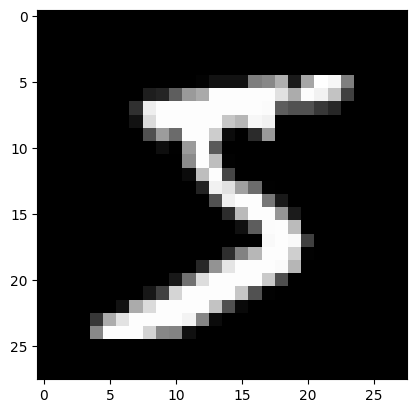

In [47]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

plt.imshow(x_train[0].reshape(28,28), cmap='gray')
print(f"size of training data (number of samples, number of pixels): {x_train.shape}")
print(f"size of test data (number of samples, number of pixels): {x_valid.shape}")

# Convert data to torch tensors and move to detected device
x_train, y_train, x_valid, y_valid = map(
    lambda x: torch.tensor(x).to(device), (x_train, y_train, x_valid, y_valid)
)

Let's first create a model with only one layer using nothing but PyTorch tensor operations. 
Follow these steps to create the corresponding functions

Then we will combine all of them as a class for training

(1) Use tensors to store information: x = torch.tensor(x) or any built-in functions of torch 

(2) Initialize weights with randomness

(3) use ``requires_grad`` to tell the computer that they require a gradient. This means that Pytorch will record all of the operations done on the tensor and calculate the gradient during back-propagation automatically.

In [86]:
# Create a NN with linear model and (28*28) inputs and 10 outputs

# Initialize weights and bias 
weights = torch.randn(28*28, 10, device=device, dtype=dtype, requires_grad=True)
bias = torch.randn(10, device=device, dtype=dtype, requires_grad=True)

Pytorch has several built-in activation functions in ```torch.nn.functional```, however, it is necessary to know how to define one by yourself. PyTorch will
even create fast GPU or vectorized CPU code for your function automatically. Let's define log_softmax function and use it as our activation to increase the complexity of our NN

$${\bf \theta} = \log\left(\frac{{\exp}({x_{i})}}{\sum_{j}{\bf \exp}({x_{j})}}\right)$$
$${\bf \theta} = x-\log{\sum_{j}{\bf \exp}({x_{j})}}$$

In [68]:
def log_softmax(x):
    # Implement log_softmax function
    return x - torch.logsumexp(x, dim=1, keepdim=True)

def model(x):
    # Implement the NN model
    return log_softmax(x.mm(weights) + bias)

In the above, the ``@`` stands for the dot product operation.

Now we design a batch size of 64 to train each time

In [69]:
bs = 64  # batch size

xb = x_train[0:bs]  # a mini-batch from x without randomness

preds = model(xb)  # predictions

print(preds[0], preds.shape)

tensor([-2.3914, -2.4536, -1.9415, -2.1361, -2.3254, -2.5035, -2.1890, -2.4626,
        -2.2429, -2.5514], device='cuda:0') torch.Size([64, 10])


As you see, the ``preds`` tensor contains not only the tensor values, but also a
gradient function. We'll use this later to do backprop.

Let's implement negative log-likelihood to use as the loss function
(again, we can just use standard Python):



In [70]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

Let's check our loss with our random model, so we can see if we improve
after a backprop pass later.



In [71]:
yb = y_train[0:bs]
print(preds[range(yb.shape[0]),yb])
print(loss_func(preds, yb))

tensor([-2.5035, -2.0786, -2.6836, -2.5166, -2.7522, -2.6427, -2.4922, -1.7635,
        -2.4818, -2.6571, -1.9900, -2.5145, -2.0963, -2.0647, -2.4944, -2.7239,
        -2.2185, -2.8900, -1.9555, -2.5886, -2.8683, -2.0543, -2.3711, -2.4470,
        -2.2655, -2.3545, -2.3788, -1.8357, -1.8788, -2.5022, -2.4913, -2.5962,
        -2.3427, -2.4654, -2.1473, -2.1911, -2.3003, -2.0345, -2.2450, -2.3701,
        -2.1454, -2.5806, -2.2166, -2.7749, -2.1926, -2.5674, -2.4167, -2.4112,
        -2.1057, -1.9761, -1.9799, -2.4054, -2.4126, -2.3880, -2.3038, -2.4381,
        -2.1493, -2.6671, -2.5088, -2.4125, -3.0333, -2.5812, -1.9539, -2.1651],
       device='cuda:0')
tensor(2.3599, device='cuda:0')


Let's also implement a function to calculate the accuracy of our model.
For each prediction, if the index with the largest value matches the
target value, then the prediction was correct.



In [72]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

Let's check the accuracy of our random model, so we can see if our
accuracy improves as our loss improves.



In [73]:
print(accuracy(preds, yb))

tensor(0.0781, device='cuda:0')


We can now run a training loop.  For each iteration, we will:

- select a mini-batch of data (of size ``bs``)
- use the model to make predictions
- calculate the loss
- ``loss.backward()`` updates the gradients of the model, in this case, ``weights``
  and ``bias``.

In [87]:
lr = 0.5  # learning rate
epochs = 2  # how many epochs to train for

for epoch in range(epochs):
    for i in range((x_train.shape[0] - 1) // bs + 1): #floor division
        start_i=i*bs
        end_i =start_i + bs
        # grab batch of data (xb) and targets (yb)
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        # predict output
        preds = model(xb)
    
        # calculate loss
        loss = loss_func(preds, yb)

        # backpropagation error
        loss.backward()
        with torch.no_grad():
            #update weights and bias
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            # zero the gradients
            weights.grad.zero_()
            bias.grad.zero_()

    print('Epochs {}: loss {}, accuracy {}'.format(epoch, loss_func(model(xb), yb), accuracy(model(xb), yb)))

Epochs 0: loss 0.3908098042011261, accuracy 0.875
Epochs 1: loss 0.16052523255348206, accuracy 0.9375


That's it: we've created and trained a minimal neural network (in this case, a
logistic regression, since we have no hidden layers) entirely from scratch!

Let's check the loss and accuracy and compare those to what we got
earlier. We expect that the loss will have decreased and accuracy to
have increased, and they have.



In [80]:
print('loss:', loss_func(model(xb), yb).item(), 'accuracy:', accuracy(model(xb), yb).item())

loss: 0.08186876773834229 accuracy: 1.0


### Part III: package your model for training, testing and validation



------------------------------
The above work can be easily done by using torch.nn.functional. Please rewrite the above code to be more concise and flexible. Make it shorter, more understandable.

Here is the list of modules that you should try to read:
1. [torch.nn](https://pytorch.org/docs/stable/nn.html)
2. [torch.optim](https://pytorch.org/docs/stable/optim.html)
3. [Dataset](https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset)
4. [DataLoader](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader)

 - Step 1: use activation and loss function from ``torch.nn.functional``. We use torch.nn.Parameter for defining learnable parameters of a model. They can be returned by Minist_Logistic.parameters()

In [123]:
import torch.nn.functional as F
import torch.nn as nn

class Mnist_Logistic(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 10)

    def forward(self, x):
        return F.log_softmax(self.fc1(x), dim=1)

# Intialize the model and move it to the device
model = Mnist_Logistic().to(device)
print(model)

Mnist_Logistic(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


- Step 2: Define a loss function and optimizer

In [124]:
import torch.optim as optim

# see the size of learnable parameters
params=list(model.parameters())
print(params[0].shape)  # weights
print(params[1].shape)  # bias


torch.Size([10, 784])
torch.Size([10])


In [126]:
# See your gradients are correctly computed and updated in the training loop
out=model(x_train[0].unsqueeze(0))  # unsqueeze to add batch dimension

criterion=torch.nn.CrossEntropyLoss()
loss=criterion(out, y_train[0].unsqueeze(0))

print(loss)
# For illustration, let us follow a few steps backward
print(loss.grad_fn)  # NLLLoss
print(loss.grad_fn.next_functions[0][0])  # LogSoftmax

model.zero_grad()
print('fc1 weight grad before backward:', model.fc1.weight.grad)

loss.backward()
print('fc1 weight grad after backward:', model.fc1.weight.grad)

tensor(2.4186, device='cuda:0', grad_fn=<NllLossBackward0>)
fc1 weight grad before backward: None
fc1 weight grad after backward: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')


We don't want to run the training loops with many lines. Here is the good way to make your code clean and short

In [127]:
def fit(x_train, y_train, epochs=5, lr=0.1):
    # define loss function and optimizer inside the fit function
    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        for i in range((x_train.shape[0] - 1) // bs + 1): #floor division
            start_i=i*bs
            end_i =start_i + bs
            # grab batch of data (xb) and targets (yb)
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            # predict output
            preds = model(xb)
        
            # calculate loss
            loss = loss_func(preds, yb)

            # backpropagation error and update weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print('Epochs {}: loss {}, accuracy {}'.format(epoch, loss_func(model(xb), yb), accuracy(model(xb), yb)))

Instantiate your function and check loss value



In [131]:
fit(x_train, y_train, epochs=3, lr=0.01)

Epochs 0: loss 0.4462485611438751, accuracy 0.875
Epochs 1: loss 0.4434611201286316, accuracy 0.875
Epochs 2: loss 0.44035059213638306, accuracy 0.875


$\textbf{Practice 2}$: Improve accuracy by tuning the hyperparameters or the NN architecture

- using TensorDataset

PyTorch has an abstract Dataset class. A Dataset can be anything that has a __len__ function (called by Python's standard len function) and a __getitem__ function as a way of indexing into it. This [tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) walks through a nice example of creating a custom FacialLandmarkDataset class as a subclass of Dataset.

By defining a length and way of indexing, this also gives us a way to iterate, index, and slice along the first dimension of a tensor. This will make it easier to access both the independent and dependent variables in the same line as we train.

In [135]:
from torch.utils.data import TensorDataset
train_ds = TensorDataset(x_train, y_train)

# This is how to get a batch of data from the TensorDataset
xb, yb = train_ds[0:bs]

print(xb.shape, yb.shape)


torch.Size([64, 784]) torch.Size([64])


- using DataLoader

Pytorch's ``DataLoader`` is responsible for managing batches. You can
create a ``DataLoader`` from any ``Dataset``. ``DataLoader`` makes it easier
to iterate over batches. Rather than having to use ``train_ds[i*bs : i*bs+bs]``,
the DataLoader gives us each minibatch automatically.



In [133]:
from torch.utils.data import DataLoader

train_dl = DataLoader(train_ds, batch_size=bs)

In [136]:
# use the DataLoader to get a batch of data
xb, yb = next(iter(train_dl)) 
print(xb.shape, yb.shape)

torch.Size([64, 784]) torch.Size([64])


Thanks to Pytorch's ``nn.Module``, ``nn.Parameter``, ``Dataset``, and ``DataLoader``,
our training loop is now dramatically smaller and easier to understand. Let's
now try to add the basic features necessary to create effecive models in practice.

 -  Add validation
In reality, we always need to take care the overfitting issue. We can avoid it by:
(1) add validation
(2) shuffling the training data prevent correlation between batches and overfitting. 

In [ ]:
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

(Note that we always call ``model.train()`` before training, and ``model.eval()``
before inference, because these are used by layers such as ``nn.BatchNorm2d``
and ``nn.Dropout`` to ensure appropriate behaviour for these different phases.)

$\textbf{Practice 3}$: rewrite the fit function with train_dl function and rint the validation loss at the end of each epoch.

$\textbf{Practice 4}$: plot loss values and validations values
In order to understand the progress of your training, error curves with test and validation are very common to be shown.
Change your code in order to see the curves

Summary 
-----------------

We have seen and practice the following functions

 - **torch.nn**

   + ``Module``: creates a callable which behaves like a function, but can also
     contain state(such as neural net layer weights). It knows what ``Parameter`` (s) it
     contains and can zero all their gradients, loop through them for weight updates, etc.
   + ``Parameter``: a wrapper for a tensor that tells a ``Module`` that it has weights
     that need updating during backprop. Only tensors with the `requires_grad` attribute set are updated
   + ``functional``: a module(usually imported into the ``F`` namespace by convention)
     which contains activation functions, loss functions, etc, as well as non-stateful
     versions of layers such as convolutional and linear layers.
 - ``torch.optim``: Contains optimizers such as ``SGD``, which update the weights
   of ``Parameter`` during the backward step
 - ``Dataset``: An abstract interface of objects with a ``__len__`` and a ``__getitem__``,
   including classes provided with Pytorch such as ``TensorDataset``
 - ``DataLoader``: Takes any ``Dataset`` and creates an iterator which returns batches of data.

